In [13]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as cr, confusion_matrix as cm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [15]:
z = pd.read_csv("loan_applications.csv")

In [17]:
z = pd.read_csv('loan_applications.csv')
z.head()#display the DataFrame

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0


In [18]:
z

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0
...,...,...,...,...,...,...,...
8842,8681053,17/11/2020,5000,60,Employed - full time,Wedding,0
8843,8768469,20/11/2020,8000,24,Employed - full time,Wedding,0
8844,8794971,22/11/2020,1000,36,Employed - full time,Wedding deposit,0
8845,8875138,24/11/2020,10000,60,Self employed,Wedding,0


In [6]:
z.info()# Display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 3   ALL_Count                             8847 non-null   int64  
 4   ALL_CountActive                       8847 non-null   int64  
 5   ALL_CountClosedLast12Months           8847 non-null   int64  
 6   ALL_CountDefaultAccounts              8847 non-null   int64  
 7   ALL_CountOpenedLast12Months           8847 non-null   int64  
 8   ALL_CountSettled                      8847 non-null   int64  
 9   ALL_MeanAccountAge                    8847 non-null   float64
 10  ALL_SumCurrentOutstandingBal          8847 non-null   int64  
 11  ALL_SumCurrentOut

In [16]:
a5 = pd.read_csv("credit_features_subset.csv")


In [19]:
new_z = pd.merge(z, a5, on = ["UID"], how = "inner")


In [20]:
new_z

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0,162,17,18,12,0,0,0,6,70.94,68555,15019,-1,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0,266,30,14,10,0,4,0,4,104.79,2209,2209,-1,7
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0,90,52,4,2,0,1,0,2,68.25,5108,5108,-1,7
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0,163,19,14,6,1,1,0,8,67.50,25738,25738,-1,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0,129,2,38,19,4,9,8,19,56.45,5801,5801,-1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8842,8681053,17/11/2020,5000,60,Employed - full time,Wedding,0,164,2,22,16,2,0,5,6,52.36,10968,10968,-1,0
8843,8768469,20/11/2020,8000,24,Employed - full time,Wedding,0,275,20,7,4,1,1,0,3,73.57,2204,2204,-1,7
8844,8794971,22/11/2020,1000,36,Employed - full time,Wedding deposit,0,145,8,14,13,0,0,1,1,44.14,6786,6786,-1,0
8845,8875138,24/11/2020,10000,60,Self employed,Wedding,0,12,7,4,3,1,0,3,1,9.25,9398,9398,-1,0


In [21]:
new_z.isnull().sum()

,0
UID,0
ApplicationDate,0
Amount,0
Term,0
EmploymentType,0
LoanPurpose,0
Success,0
ALL_AgeOfOldestAccount,0
ALL_AgeOfYoungestAccount,0
ALL_Count,0


In [22]:
new_z.drop(["ALL_TimeSinceMostRecentDefault"], axis = 1, inplace = True)

<Axes: xlabel='Month', ylabel='Success'>

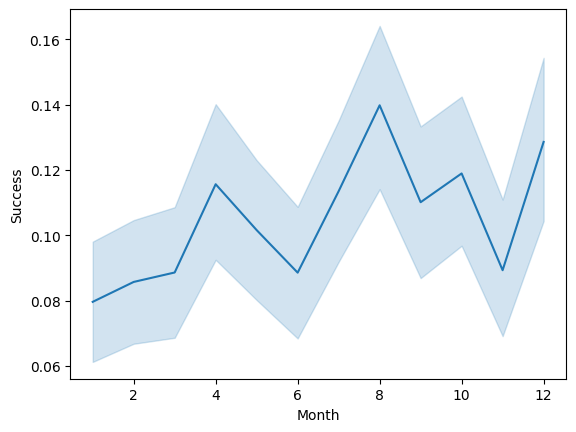

In [23]:
plt.xlabel("Month");
sns.lineplot(x = pd.DatetimeIndex(new_z["ApplicationDate"]).month, y = new_z["Success"],data = new_z)

<Axes: xlabel='EmploymentType', ylabel='Success'>

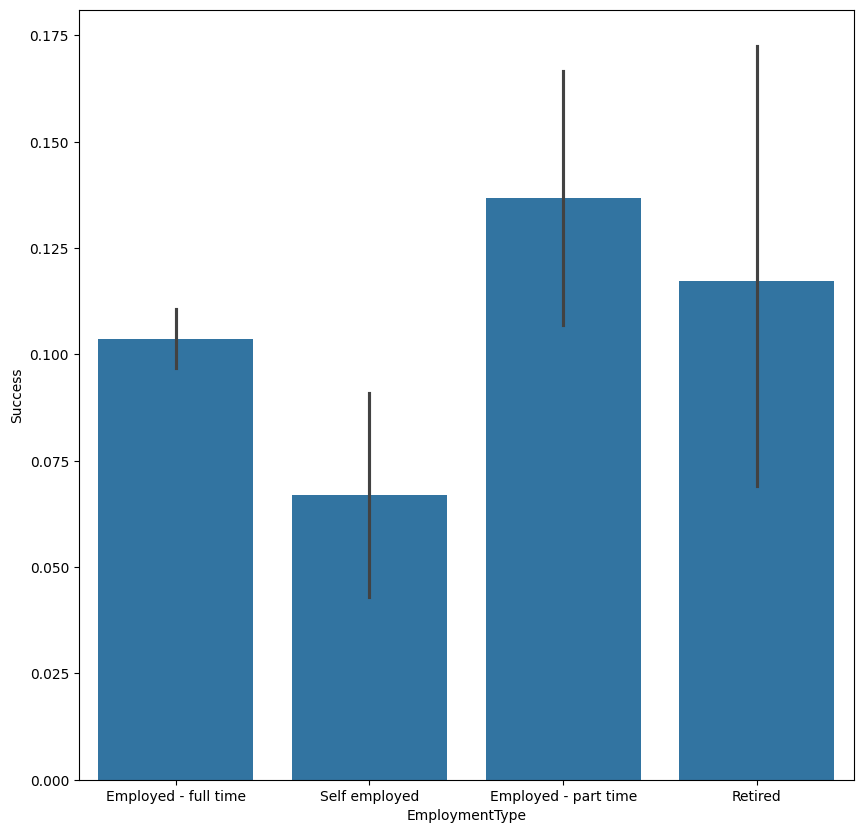

In [24]:
plt.figure(figsize = (10, 10))
sns.barplot(x = new_z["EmploymentType"], y = new_z["Success"], data = new_z)

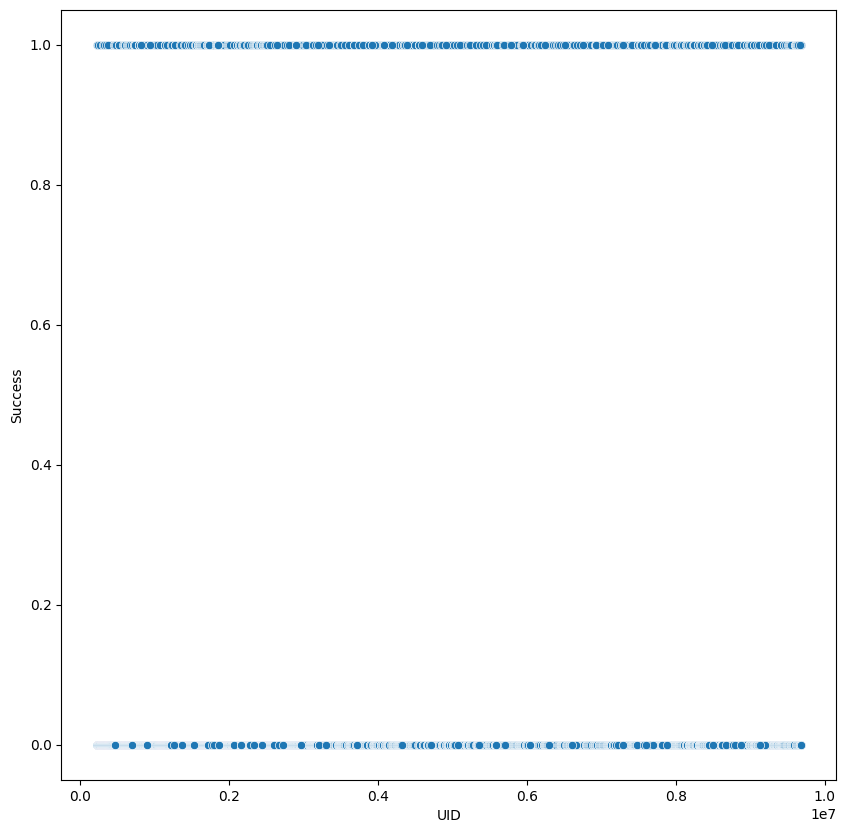

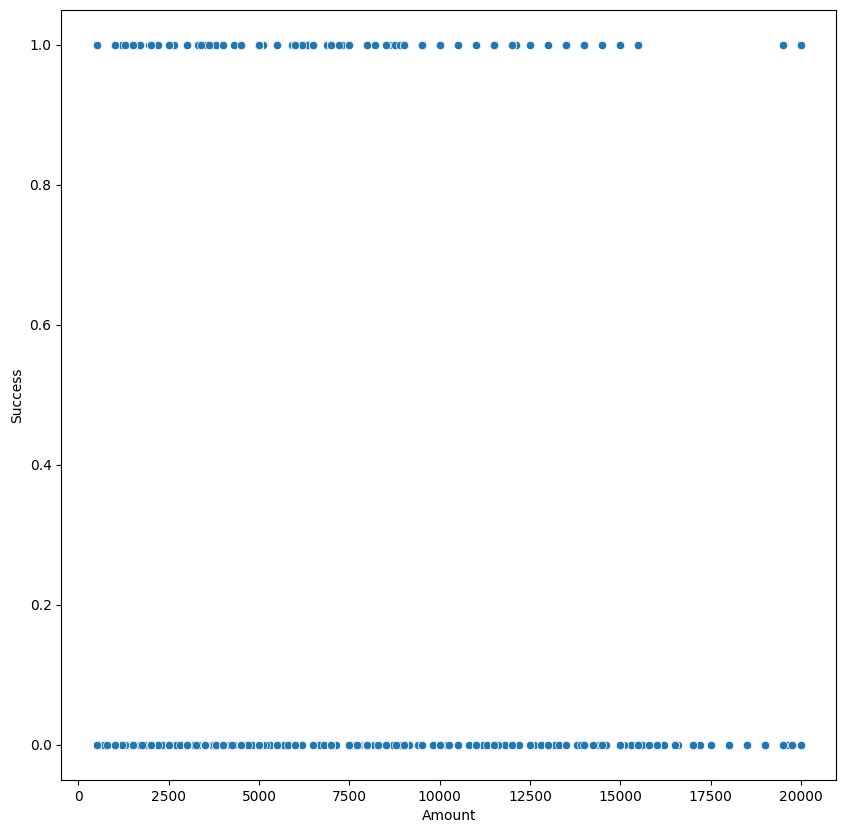

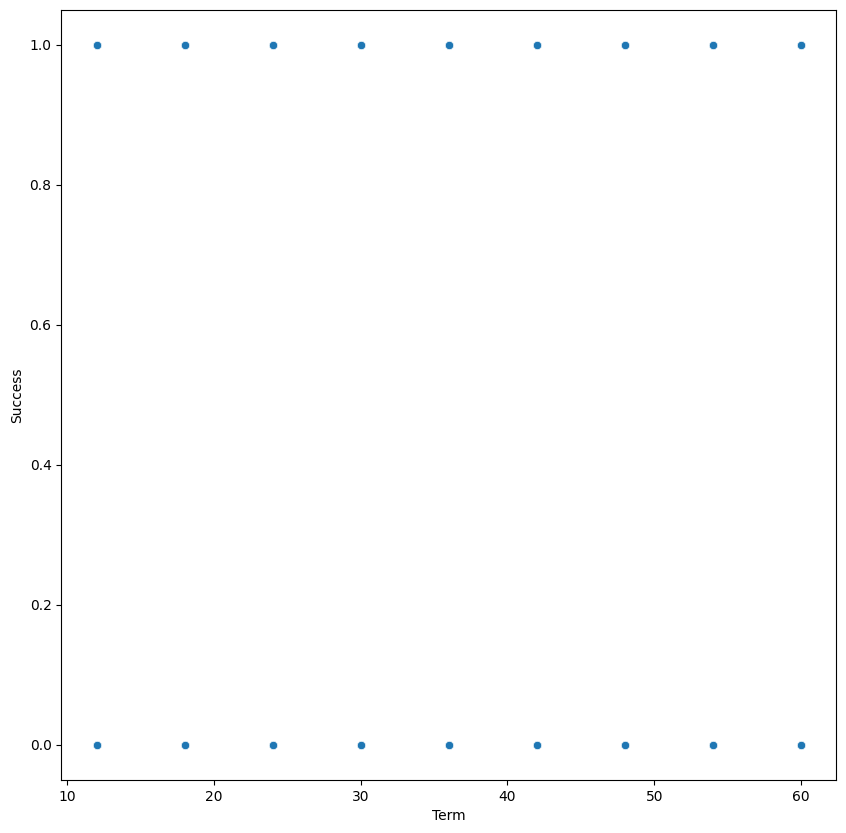

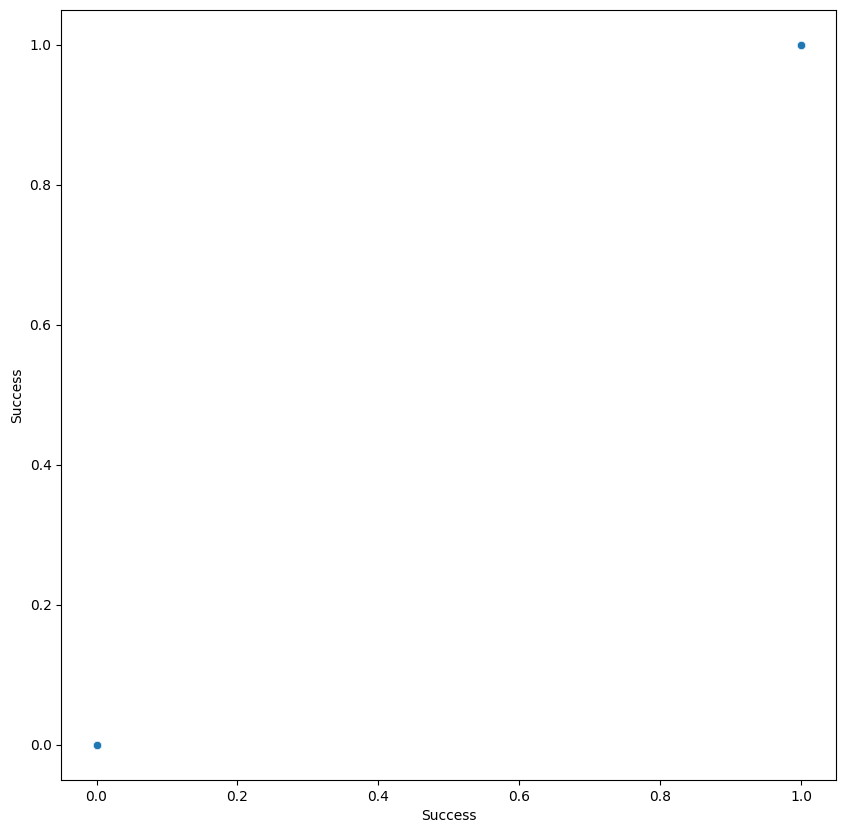

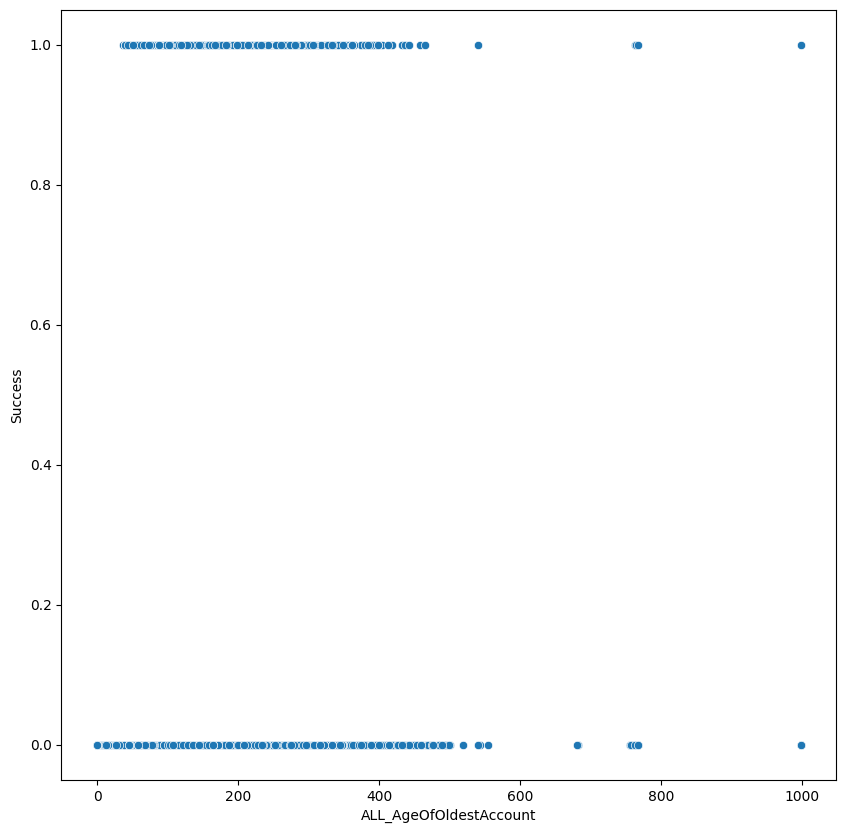

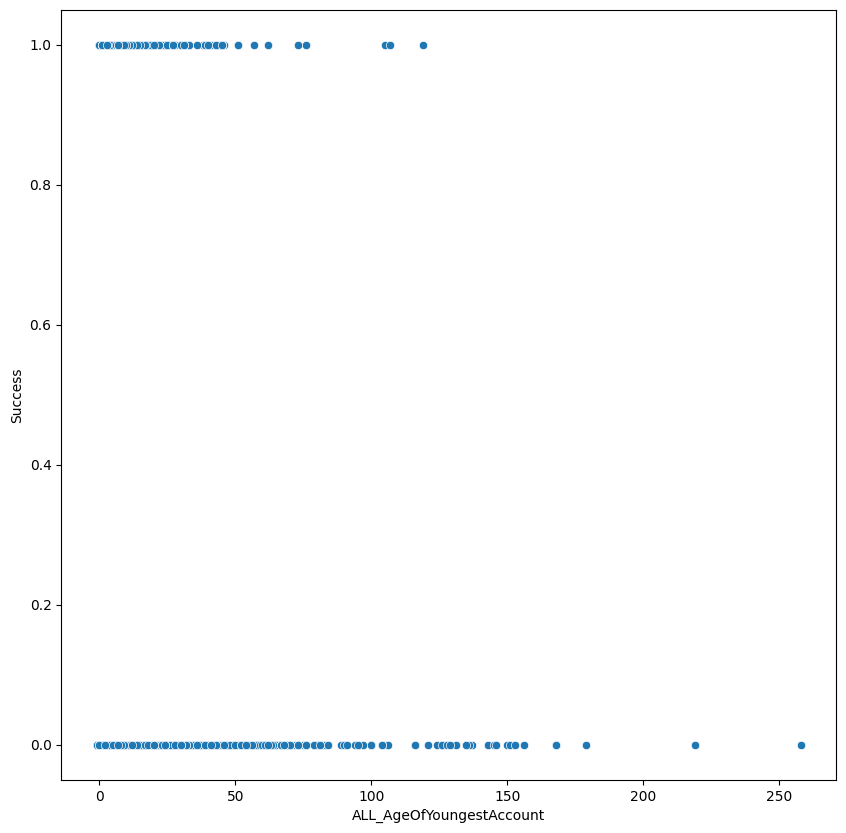

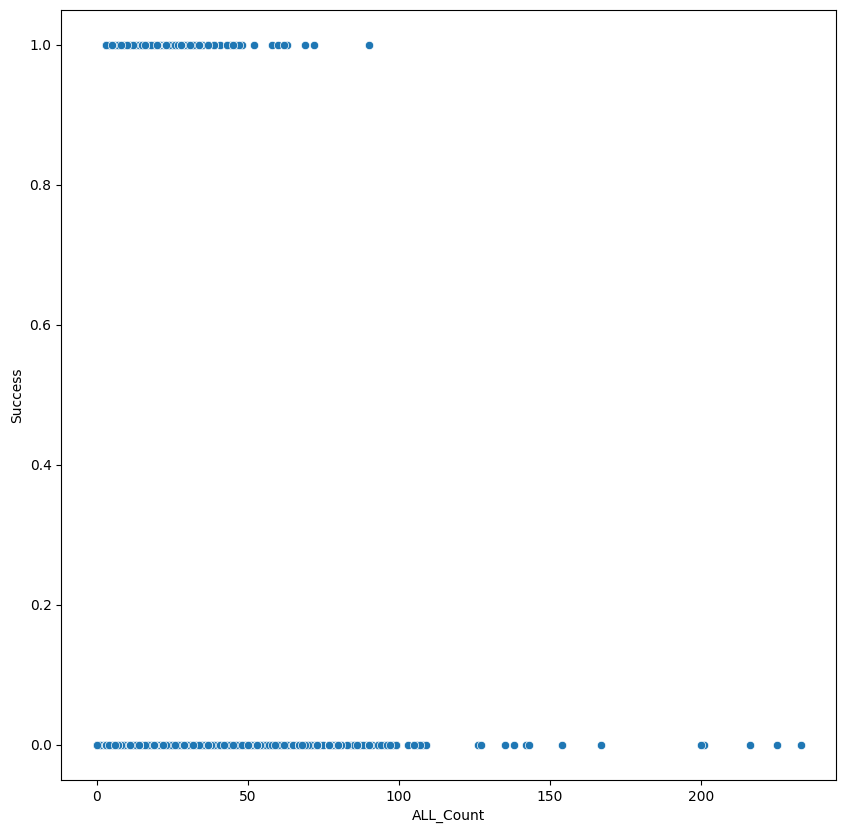

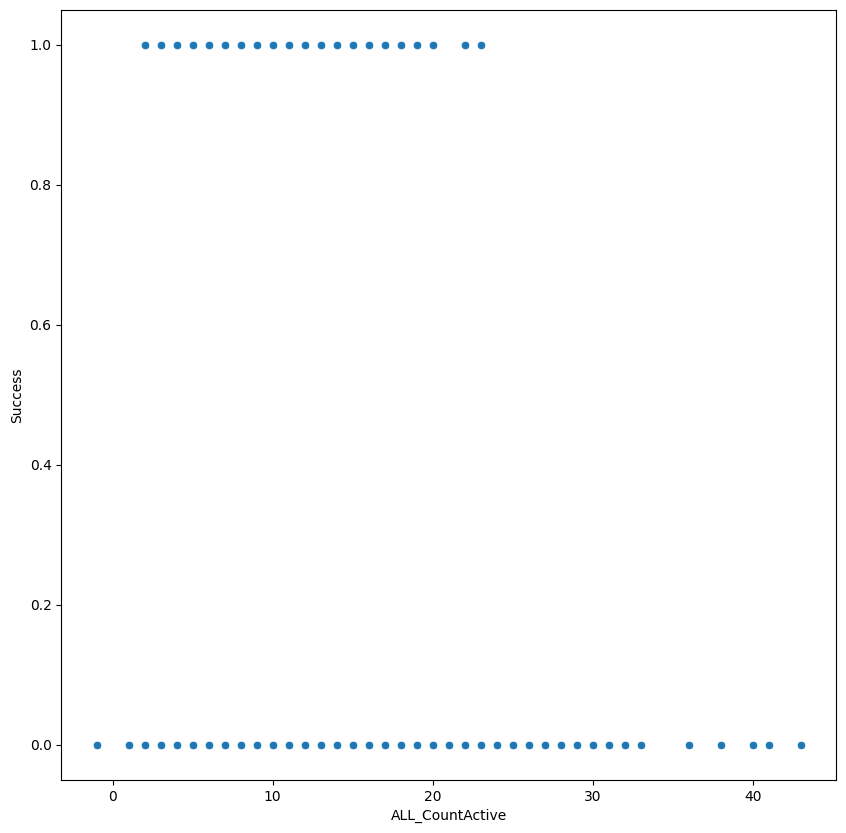

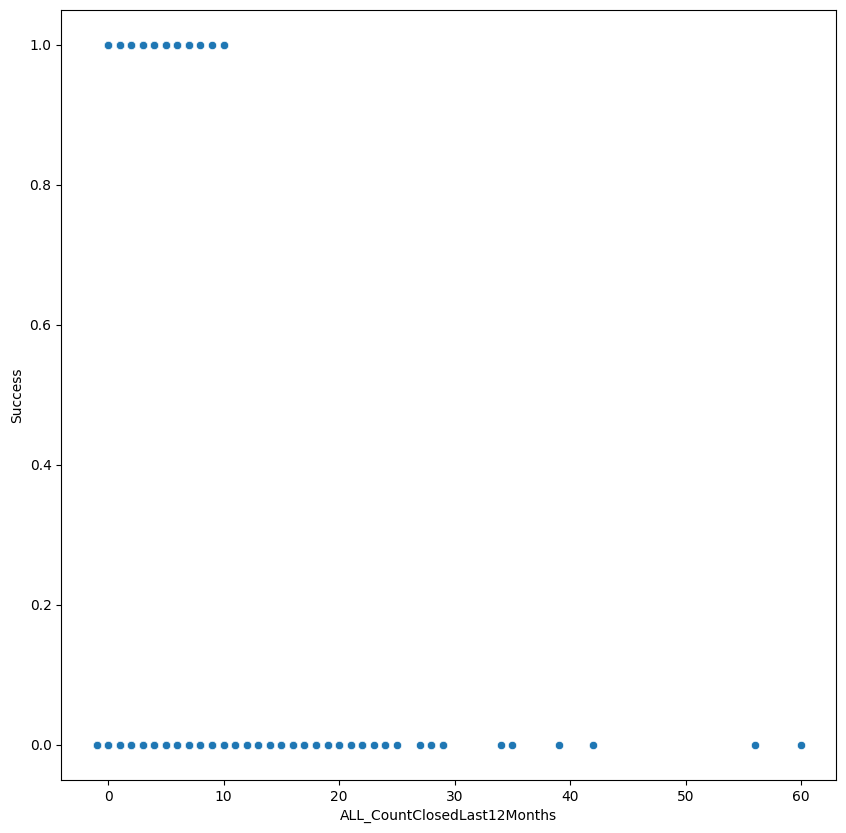

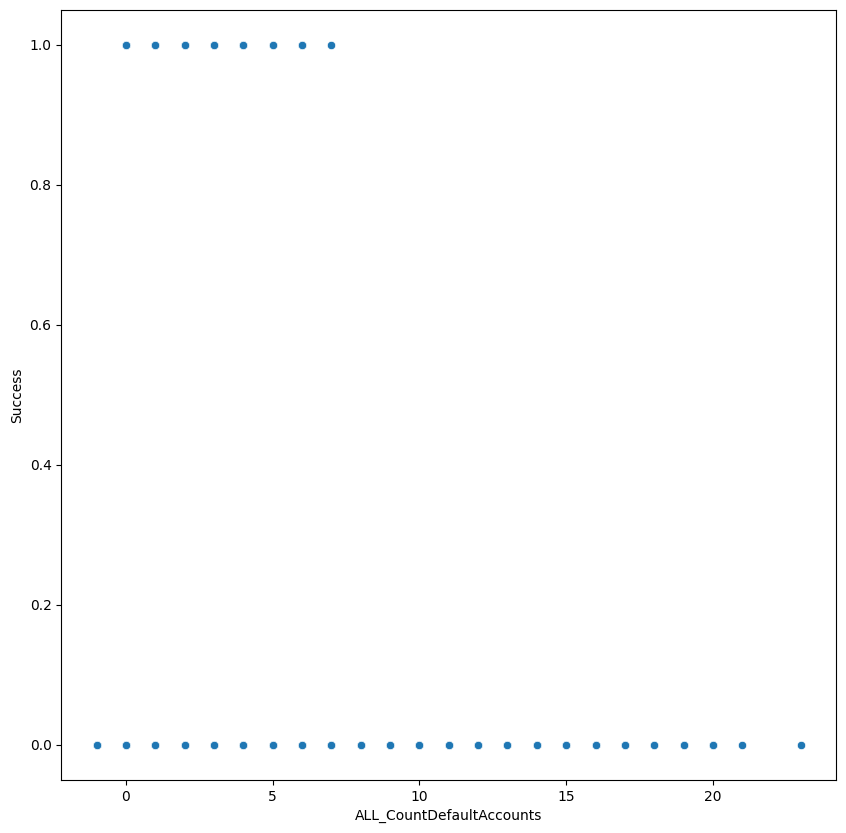

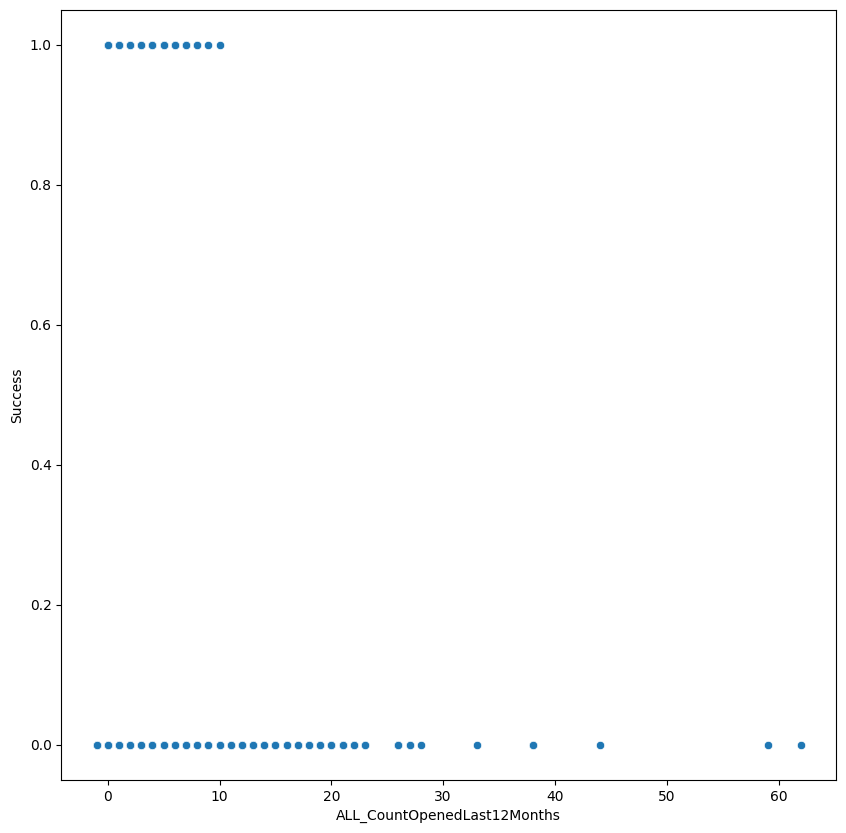

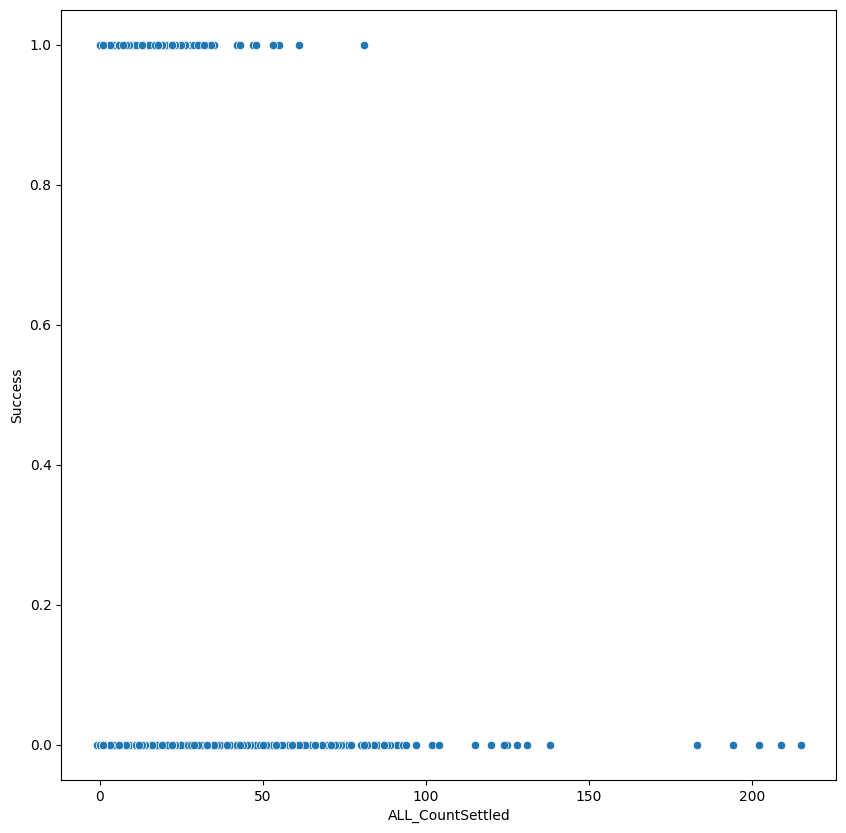

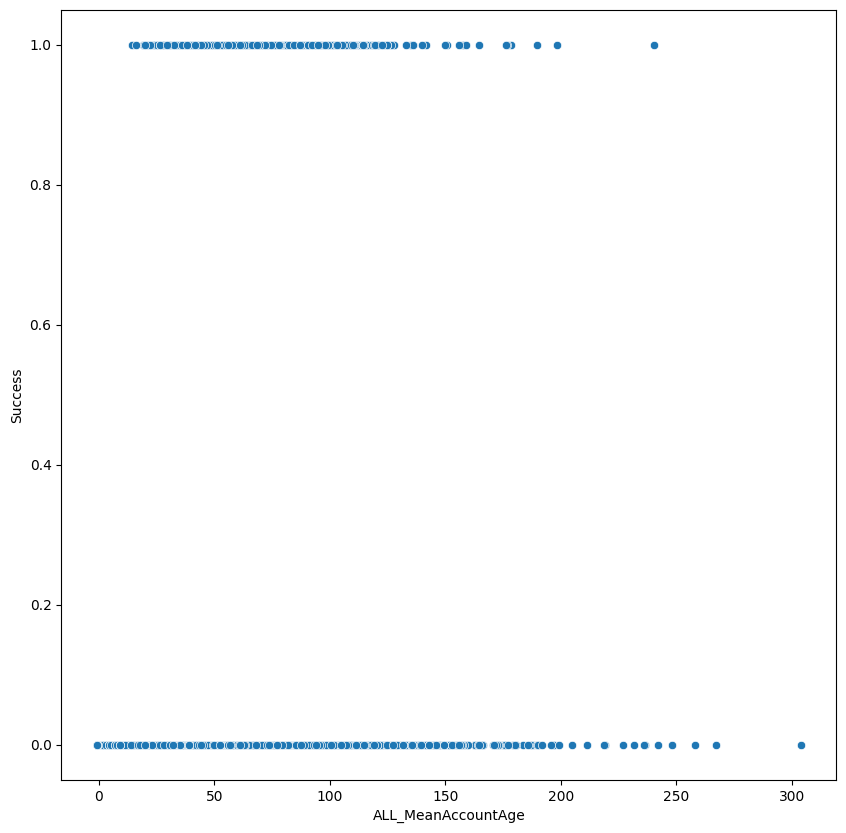

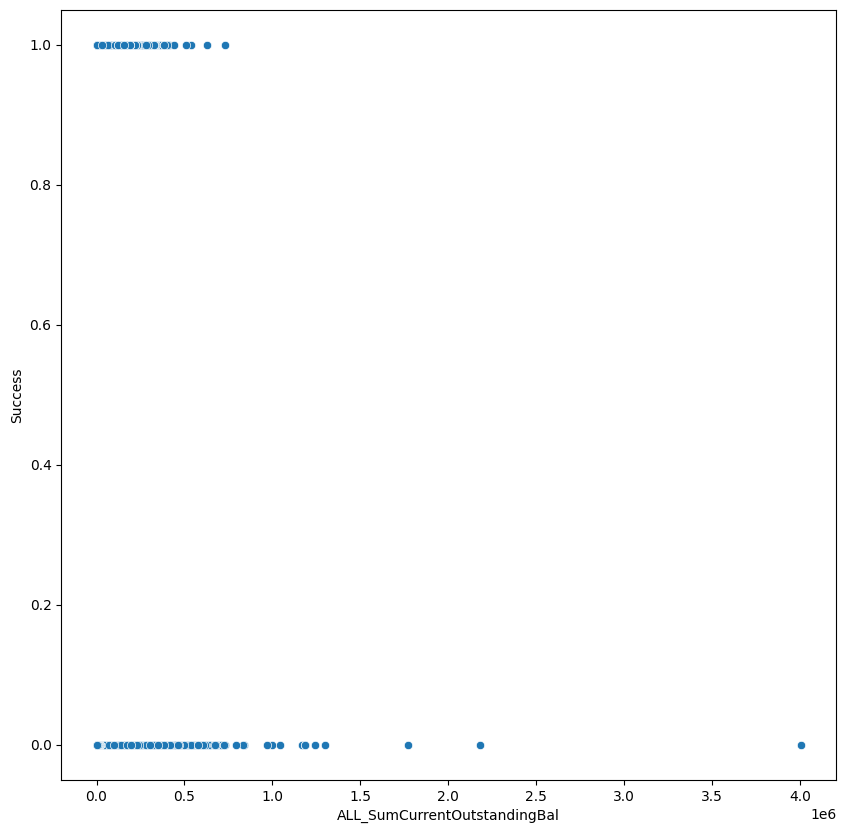

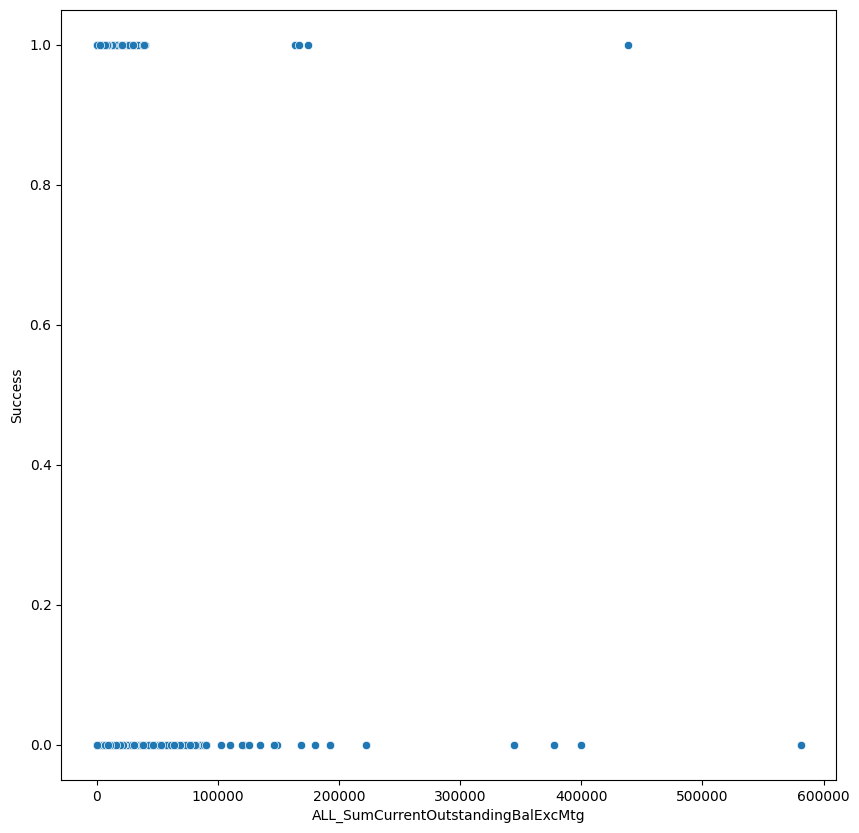

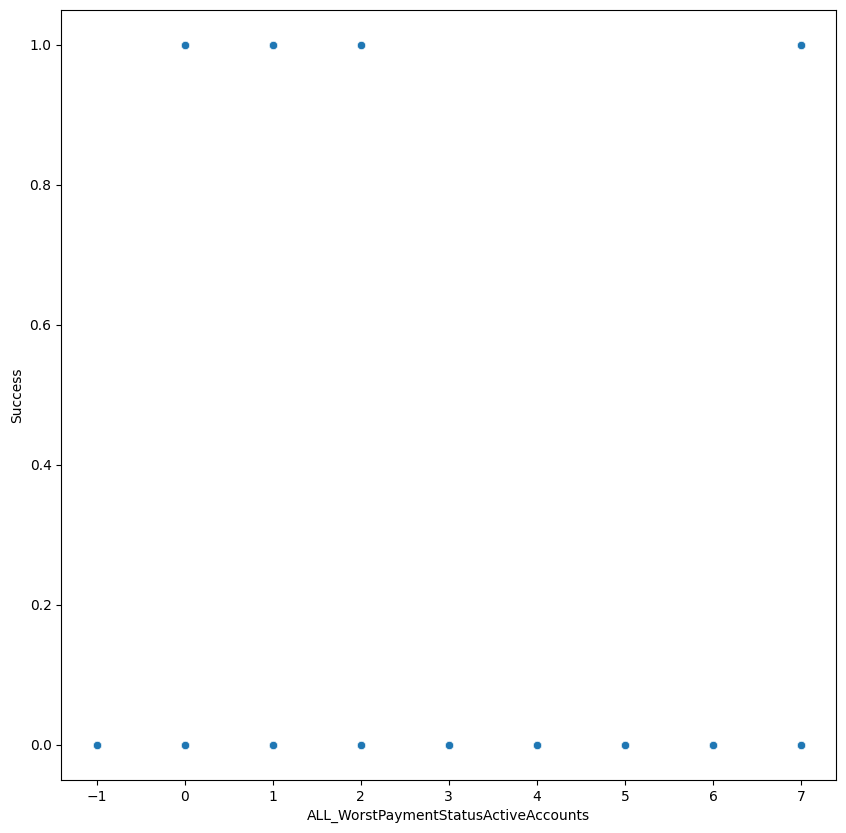

In [25]:
for i in new_z:
    if(new_z[i].dtype != "object"):
        plt.figure(figsize = (10, 10))
        sns.scatterplot(x = new_z[i], y = new_z["Success"], data = new_z)